#### Load Libraries

In [1]:
# Pandas and numpy
import pandas as pd
import numpy as np

# Additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn as sklearn

### Load Data

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(10)

### Exploratory Data Analysis

You can leverage what done in one of the previous assignments, recreate it and expand it.

#### Dataset overview

Let's first understand the overall characteristics of the dataset: the shape, the column types, descriptive statistics (if applicable), and if there are missing values.

In [ ]:
# Looking at the database shape
df.shape

There are 7043 entries and 21 features in this dataset.

In [ ]:
# Seeing dtypes
df.dtypes

Most columns appear to be objects. The object dtype can be useful, but this means that we have to examine the column content to make sure that it is consistent.

In [ ]:
df.describe()

There are three columns that are currently in numeric data types: `SeniorCitizen`, `tenure`, and `MonthlyCharges`. However, we will see later that another column is numeric in nature, while one of these columns is not to be treated as a numeric variable.

In [ ]:
# Checking for missing values
df.isna().sum()

There are 0 null values, however this does not necessarily mean that all values are usable. We will see later if there are values that need cleaning.

#### Univariate analysis

In this section, we will look at each of the columns in the dataframe, get to know their contents, and see if any adjustments have to be made to dataframe content (cleaning, standardisation etc.)

##### `customerID`

In [ ]:
# Sample of column entries
df['customerID'].head()

We can see that column `customerID` is supposed to be a unique identifier, so there isn't much in terms of visualising distribution, etc. We can do with this column. However, we should check to see if there are any duplicates.

In [ ]:
# Checking for duplicates
len(df['customerID']) - len(df['customerID'].drop_duplicates()) 

We should also check to see if values in `customerID` are of consistent length, just in case.

In [ ]:
df['customerID'].str.len().value_counts()

##### `gender`

In [ ]:
# Sample of column entries
df['gender'].head()

This appears to be a column with values pertaining to the customer's gender. Let's see the unique values in the column and their distribution by using `value_counts()`.

In [ ]:
# Distribution of values
df['gender'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['gender'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['gender'].value_counts().plot.bar()

There appears to be a fairly even gender distribution in this dataset.

##### `SeniorCitizen`

In [ ]:
# Sample of column entries
df['SeniorCitizen'].tail()

This appears to be a column with values pertaining to the customer's senior citizen status. **Interestingly, this column has the `int64` datatype, even though the information appears to be categorical/boolean in nature.** Let's see the unique values in the column and their distribution by using `value_counts()`.

In [ ]:
# Distribution of values
df['SeniorCitizen'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['SeniorCitizen'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['SeniorCitizen'].value_counts().plot.bar()

It appears that 16.2% of the respondents are senior citizens, with the remaining not having senior citizen status.

##### `Partner`

In [ ]:
# Sample of column entries
df['Partner'].head()

This appears to be a column with values recording if the customer has a Partner. **This column's values also appear to indicate if something is true or false, but uses the `object` dtype instead of `int64` like `SeniorCitizen.`** Let's look at the datatype of the first object:

In [ ]:
type(df['Partner'].values.item(0))

Let's see if this is true for all items. We will define a function `typecheck` that we can use later in this notebook.

In [ ]:
def typecheck(data, type_query, error_msg=True):
    """
    A function that checks if all entries in a dataframe column are of a certain type.
    Written because we could not find something in the Pandas documentation that gives me
    value types aside from the column type, which is frustrating if column dtype is 'O.'
    Would love to know if something else exists.

    data - Pandas series, or dataframe column if entered as df['column']
    
    type_query - dtype, as type str

    
    """
    count = 0
    type_ = np.dtype(type_query)
    for i in range(len(data.values)):
        if type(data.values.item(i)) == type_:
            count = count + 1
        else:
            if error_msg == True:
                print('There is an item in position ' + str(i) + ' with value ' + str(data.values.item(i)) + ' and type ' + str(type(data.values.item(i))))
    print(str(count) + ' items are type ' + type_query + ', out of ' + str(len(data)))


In [ ]:
# Checking if this is the case for 
typecheck(df['Partner'], 'str')

All items are of type `str`. Let's see the unique values in the column and their distribution by using `value_counts()`.

In [ ]:
# Distribution of values
df['Partner'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['Partner'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['Partner'].value_counts().plot.bar()

The customer base is fairly evenly split between customers who have partners and those who do not.

##### `Dependents`

In [ ]:
# Sample of column entries
df['Dependents'].head()

This appears to be another Yes/No column pertaining to whether or not customers have Dependents. This likely usually applies to children. We can confirm that all entries are string:

In [ ]:
typecheck(df['Dependents'], 'str')

Let's look at unique values and distribution:

In [ ]:
# Distribution of values
df['Dependents'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['Dependents'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['Dependents'].value_counts().plot.bar()

It appears that most customers do not have Dependents, with only 30% of customers reporting that they do.

##### `tenure`

In [ ]:
# Sample of column entries
df['tenure'].head()

This appears to be our first **numeric** column, with a dtype of `int64`. This probably refers to the number of units of time that customers have been engaged with the telco, which we imagine to be months as customers are usually billed monthly. We know from earlier that there are no misnullsing values in this column, so let's get some descriptive statistics to have an idea of the values' range and variability.

In [ ]:
df['tenure'].describe()

`min` appears to be 0, so let's check how many values are 0 in this dataset:

In [ ]:
print('There are ' + str(len(df[df['tenure'] == 0]['tenure'])) + ' rows which have a tenure value at 0, which is ' + str(len(df[df['tenure'] == 0]['tenure']) / len(df) * 100) + '% of all rows.')

**What does it mean for a customer to have a tenure of 0 months?** It is possible these customers have not yet been billed once.

Let's see the distribution of values across the dataset.

In [ ]:
sns.histplot(data=(df['tenure']), binwidth=1)

Let's calculate skewness:

In [ ]:
df['tenure'].skew()

The distribution is positively skewed, or skewed to the left.

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [ ]:
scipy.stats.kurtosis(df['tenure'])

Kurtosis is negative, indicating that the distribution is relatively flat.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

In [ ]:
import matplotlib.pyplot

matplotlib.pyplot.boxplot(df['tenure'], notch='True', vert=0)

It appears that the last quartile has a much wider range than the others, but there are no extreme outliers.

##### `PhoneService`

In [ ]:
# Sample of column entries
df['PhoneService'].head()

This appears to be yet another Yes/No column. We imagine this pertains to whether customers have phone service as part of their plans. With the assumption that this is a Yes/No column, let's skip checking type and look at the unique values and their distribution:

In [ ]:
# Distribution of values
df['PhoneService'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['PhoneService'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['PhoneService'].value_counts().plot.bar()

Most customers appear to have phone service.

##### `internet`

In [ ]:
# Sample of column entries
df['InternetService'].head()

This appears to be a string column with options that are not 'Yes' or 'No.' Let's confirm that all objects in this array are strings:

In [ ]:
typecheck(df['InternetService'], 'str')

Let's look at unique values and their distribution.

In [ ]:
# Distribution of values
df['InternetService'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['InternetService'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['InternetService'].value_counts().plot.bar()

21.67% of customers do not have internet service.

In [ ]:
df[df['InternetService'] != 'No']['InternetService'].value_counts() / len(df[df['InternetService'] != 'No']['InternetService']) * 100

Among those who have internet service, 56% use fiber optic service, while almost 44% use DSL. 

##### `OnlineSecurity`

In [ ]:
# Sample of column entries
df['OnlineSecurity'].head()

This appears to be a string column with Yes/No values. However, let's look at the unique values:

In [ ]:
# Distribution of values
df['OnlineSecurity'].value_counts()

Other than No and Yes, there is one last option for this column: 'No internet service.' This indicates that the customer does not have internet service. Let's confirm that this corresponds 1:1 with the column `internet`:

In [ ]:
print(len(df[df['InternetService'] == 'No']) - len(df[df['OnlineSecurity'] == 'No internet service']))
print(len(df[df['OnlineSecurity'] == 'No internet service']) - len(df[df['InternetService'] == 'No']))

In [ ]:
(df[df['InternetService'] == 'No'] == df[df['OnlineSecurity'] == 'No internet service']).value_counts()

They appear to correspond. Let's look at their distribution:

In [ ]:
# Distribution of values as percentage of all entries
df['OnlineSecurity'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['OnlineSecurity'].value_counts().plot.bar()

When one-hot encoding, we may consider recording both 'No' and 'No internet service' as 0.

##### `OnlineBackup`

In [ ]:
# Sample of column entries
df['OnlineBackup'].head()

Our guess is that this will be similar to `OnlineSecurity` as it appears to pertain to a service offered to customers with internet access. Checking `value_counts` confirms this:

In [ ]:
# Distribution of values
df['OnlineBackup'].value_counts()

In [ ]:
# Plotting the distribution of values
df['OnlineBackup'].value_counts().plot.bar()

##### `DeviceProtection`

In [ ]:
# Sample of column entries
df['DeviceProtection'].head()

Let's look at the unique values:

In [ ]:
# Distribution of values
df['DeviceProtection'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['DeviceProtection'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['DeviceProtection'].value_counts().plot.bar()

##### `TechSupport`

In [ ]:
# Sample of column entries
df['TechSupport'].head()

This appears to be another Yes/No column, presumably for customers with internet service. Let's look at unique values and distribution:

In [ ]:
# Distribution of values
df['TechSupport'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['TechSupport'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['TechSupport'].value_counts().plot.bar()

Almost half of the customers have internet service but are not signed up for `TechSupport`, and around 71% of customers in total do not use it.

##### `StreamingTV`

In [ ]:
# Sample of column entries
df['StreamingTV'].head()

This appears to be another Yes/No string column, presumably for customers who have a TV streaming package with their internet plan, and we can check the unique values and distribution:

In [ ]:
# Distribution of values
df['StreamingTV'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['StreamingTV'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['StreamingTV'].value_counts().plot.bar()

##### `StreamingMovies`

In [ ]:
# Sample of column entries
df['StreamingMovies'].head()

This appears to be another Yes/No string column, presumably referring to customers who sign up for a movie streaming service addon with their internet plan, and we can check the unique values:

In [ ]:
# Distribution of values
df['StreamingMovies'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['StreamingMovies'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['StreamingMovies'].value_counts().plot.bar()

##### `Contract`

In [ ]:
# Sample of column entries
df['Contract'].head()

This appears to be a string column with different options. Let's confirm that all items are strings:

In [ ]:
typecheck(df['Contract'], 'str')

Let's use `value_counts` to learn about unique values and their distribution in the dataset.

In [ ]:
# Distribution of values
df['Contract'].value_counts()

These appear to be contract types.

In [ ]:
# Plotting the distribution of values
df['Contract'].value_counts().plot.bar()

Most customers are on monthly contracts.

##### `PaperlessBilling`

In [ ]:
# Sample of column entries
df['PaperlessBilling'].head()

This appears to be a Yes/No column. Let's check if all items are strings:

In [ ]:
typecheck(df['PaperlessBilling'], 'str')

Let's look at unique values and distribution:

In [ ]:
# Distribution of values
df['PaperlessBilling'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['PaperlessBilling'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['PaperlessBilling'].value_counts().plot.bar()

It appears that almost 3/5 of customers use paperless billing.

##### `PaymentMethod`

In [ ]:
# Sample of column entries
df['PaymentMethod'].head()

This appears to be a string column with multiple options for different payment modes used by customers. Let's check what the item dtypes are:

In [ ]:
typecheck(df['PaymentMethod'], 'str')

Let's look at unique values and the distribution of this series:

In [ ]:
# Distribution of values
df['PaymentMethod'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['PaymentMethod'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['PaymentMethod'].value_counts().plot.bar()

Electronic check appears to be the most popu.ar, with other payment types being mostly evenly divided.

##### `MonthlyCharges`

In [ ]:
# Sample of column entries
df['MonthlyCharges'].head()

This is our second numeric column, this time with a dtype of `float64`. This probably refers to how much customers are charged each month, with the unit presumably being dollars. We know from earlier that there are no null values in this column, so let's look at descriptive statistics:

In [ ]:
df['MonthlyCharges'].describe()

Let's see the distribution of values across the dataset.

In [ ]:
sns.histplot(data=(df['MonthlyCharges']), binwidth=1)

There appear to be multiple peaks in this histogram, which suggests that there are set plan prices with slight variations around each peak possibly attributable to discounts, administrative fees, or additional services. Let's calculate **skewness**.

In [ ]:
df['MonthlyCharges'].skew()

The distribution is negatively skewed, meaning that there is more weight towards the higher end of the distribution. If we eliminate the large number of customer who have monthly charges not more than 25 (without this segment the distribution looks more bell-shaped), this value is even more negative:

In [ ]:
df[df['MonthlyCharges'] > 25]['MonthlyCharges'].skew()

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [ ]:
scipy.stats.kurtosis(df['MonthlyCharges'])

Kurtosis is negative, indicating that the distribution is relatively flat.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

In [ ]:
matplotlib.pyplot.boxplot(df['MonthlyCharges'], notch='True', vert=0)

There do not appear to be extreme outliers in this variable.

##### `TotalCharges`

In [ ]:
# Sample of column entries
df['TotalCharges'].head()

This appears to also be about how much the customer is charged, and probably means how much the customer has been charged across the lifetime of their tenure. Let's look at descriptive statistics:

In [ ]:
df['TotalCharges'].describe()

This is interesting; `describe` yields a different descriptive statistics format than `MonthlyCharges`, suggesting that this column when read as a series is not in a numeric datatype. Indeed, the column's dtype is `object`. Before we run `typecheck`, let's check the dtype of the first item:

In [ ]:
type(df['TotalCharges'].values.item(0))

This item has a `str` type for some reason. Let's see if this is the case for other items:

In [ ]:
typecheck(df['TotalCharges'], 'str')

Judging from the print output when read in a text editor, it appears that some items were in dtype `int`.

In [ ]:
typecheck(df['TotalCharges'], 'float', error_msg=False)
typecheck(df['TotalCharges'], 'int', error_msg=False)
typecheck(df['TotalCharges'], 'str', error_msg=False)

Let's start doing data cleaning. As a best practice, let's perform data cleaning operations on a separate dataframe:

In [ ]:
# Making a 'cleaned data' dataframe
data = df

# Turning all values on TotalCharges to float
data['TotalCharges'] = pd.to_numeric(df.drop(index = df[df['TotalCharges']==' '].index, axis=0)['TotalCharges'])
data['TotalCharges']

Let's look at descriptive statistics for this new series:

In [ ]:
data['TotalCharges'].describe()

Let's see the distribution of values across the dataset.

In [ ]:
sns.histplot(data=data['TotalCharges'], binwidth=10)

There appears to be a very sharp left tail, suggeting that a large proportion of customers have a relatively low `TotalCharges` value. The tail is much longer at the left end. Let's calculate **skewness.**

In [ ]:
df['TotalCharges'].skew()

The distribution is positively skewed, or skewed to the right.

Let's calculate kurtosis to get an idea of data density around the tails relative to the peak:

In [ ]:
scipy.stats.kurtosis(df['TotalCharges'])

The kurtosis is negative.

Let's visualise this variable with a boxplot to get an idea of where many of the values are concentrated:

In [ ]:
matplotlib.pyplot.boxplot(df['TotalCharges'], notch='True', vert=0)

It appears that the last quartile has a much wider range than the others, but there are no extreme outliers.

##### `churn`

In [ ]:
# Sample of column entries
df['Churn'].head()

This appears to be our **target variable**: the one we will attempt to model later on. We are interested in how other variables affect churn, as it could inform customer retention programme design or create insights about issues in how the telco operates. This appears to be a Yes/No column. Let's confirm all items are the same type:

In [ ]:
typecheck(df['Churn'], 'str')

Let's look at the distribution of entries:

In [ ]:
# Distribution of entries
df['Churn'].value_counts()

In [ ]:
# Distribution of values as percentage of all entries
df['Churn'].value_counts() / len(df) * 100

In [ ]:
# Plotting the distribution of values
df['Churn'].value_counts().plot.bar()

#### Bivariate analysis

To enable some of our bivariate analysis, let's make a one-hot encoded version of our dataset:

In [ ]:
"""
This line of code:
1) drops customerID from the dataframe data, so that it will not be one-hot encoded;
2) uses pd.get_dummies to one-hot encode the remaining variables;
3) joins the resulting dataframe with a dataframe consisting only of customerID, so that the resulting dataframe
   has the customer ID, the one-hot encoded categorical information, and numerical variables.
"""

# Data cleaning to enable one-hot encoding
data = data.replace({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0, 'Female' : 0, 'Male' : 1})
data['InternetService'] = df['InternetService'] # 'No' values in this column need to be intact for a one-hot encoder to work.

# One-hot encoding
data_onehot = pd.DataFrame(data[('customerID')]).join(pd.get_dummies(data.drop(columns=('customerID'))))
data_onehot

Let's look at the columns in this dataframe:

In [ ]:
data_onehot.columns

##### Correlation matix

In [ ]:
data_onehot.corr()

Here is a heatmap of this correlation matrix:

In [ ]:
sns.heatmap(data_onehot.corr())

Here are the other variables in relation to `churn`:

In [ ]:
data_onehot.corr()['Churn']

From first glance, especially correlated pairs include:

<ul>
    <li>`tenure` and `TotalCharges`, which are expected to be dependent as (obviously) people who have subscribed for longer will tend to have paid more over time</li>
    <li>`StreamingTV` and `StreamingMovies` with each other and `MonthlyCharges`, which makes sense as these services are likely to require add-on charge</li>
    <li>`InternetService_Fiber optic` and `MonthlyCharges`, which makes sense</li>
    <li>`ContractType_Two year` and `tenure`, which is clearly dependent</li>
</ul>

A number of variables seem to be more correlated with `churn` than others, *relatively speaking*:

**Positive correlation**
<ul>
    <li>`ContractType_Month-to-Month`</li>
    <li>`PaymentMethod_Electronic check`</li>
    <li>`InternetService_Fiber optic`</li>
</ul>

**Negative correlation**
<ul>
    <li>`tenure`</li>
    <li>`ContractType_Two year`</li>
    <li>`InternetService_No`</li>
</ul>

##### Numeric-to-numeric

Let's look again at the correlations between the numeric variables:

In [ ]:
data_onehot[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

Let's look at scatterplots visualising the relationships between the numeric variables.

In [ ]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

`tenure` and `TotalCharges` appear to be most related, although there is some visible heteroscedasticity. `tenure` and `MonthlyCharges` appear to be most weakly related.

##### Numeric-categorical analysis

Let's look at our numerical variables in relation to churn:

In [ ]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

Let's look at them in relation to gender:

In [ ]:
sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'gender']], hue='gender')

Numeric variables did not seem to impact churn significantly.

Of course, `Churn` and `tenure` appear to have an inverse relationship.

##### Categorical-categorical analysis

Let's look at the relationships between categories:

In [ ]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(24,15))
fig.suptitle('Categorical-categorical visualisation')

sns.countplot(ax=axes[0,0], data=data, x='gender', hue='Churn')
axes[0,0].set_title('Churn and Gender')

sns.countplot(ax=axes[0,1], data=data, x='SeniorCitizen', hue='Churn')
axes[0,1].set_title('Churn and Senior Citizenship')

sns.countplot(ax=axes[0,2], data=data, x='Partner', hue='Churn')
axes[0,2].set_title('Churn and Partner')

sns.countplot(ax=axes[1,0], data=data, x='Dependents', hue='Churn')
axes[1,0].set_title('Churn and Dependents')

sns.countplot(ax=axes[1,1], data=data, x='PhoneService', hue='Churn')
axes[1,1].set_title('Churn and Phone Service')

sns.countplot(ax=axes[1,2], data=data, x='InternetService', hue='Churn')
axes[1,2].set_title('Churn and Internet Service')

sns.countplot(ax=axes[2,0], data=data, x='Contract', hue='Churn')
axes[2,0].set_title('Churn and Contract Type')

sns.countplot(ax=axes[2,1], data=data, x='PaperlessBilling', hue='Churn')
axes[2,1].set_title('Churn and Paperless Billing')

sns.countplot(ax=axes[2,2], data=data, x='PaymentMethod', hue='Churn')
axes[2,2].set_title('Churn and Payment Mode')

We can see that:

<ul>
    <li>Customers with month-to-month contracts, electronic check as their payment mode, and fiber optic internet connections appear significantly more likely to churn than not.</li>
    <li>Gender, senior citizenship, and family configuration did not seem to affect churn as much.</li>
</ul>

#### Data cleaning

We earlier performed some data cleaning operations in both Univariate and Bivariate data analysis categories in order to enable us to generate some visualisations and calculations. This section contains the earlier work done so that all data cleaning operations can be documented in this section.

Some data cleaning peculiarities found in the dataset used for the previous EDA assignment, such as missing values in `TotalCharges` and non-binary options in `Gender`, were not found in this version of the dataset.

In [23]:
# data loading
df = pd.read_csv('Telco-Customer-Churn.csv')

# making a new dataframe for cleaned data
data = df

# standardising the item type for TotalCharges
data['TotalCharges'] = pd.to_numeric(df.drop(index = df[df['TotalCharges']==' '].index, axis=0)['TotalCharges'])

# making categorical data consistent
data = data.replace({'Yes' : 1, 'No' : 0, 'No phone service' : 0, 'No internet service' : 0, 'Female' : 0, 'Male' : 1})
data['InternetService'] = df['InternetService'] # 'No' values in this column need to be intact for a one-hot encoder to work.

# creating a one-hot encoded version
data_onehot = pd.get_dummies(data.drop(columns=('customerID')))

#### Standardisation

For our later data visualisations, and for the purposes of model-building or other activities that may be sensitive to Euclidean distance, let's proceed to make versions of `data` and `data_ohe` with values standardised.

In [24]:
# Using sklearn StandardScaler
from sklearn import preprocessing
scale = sklearn.preprocessing.StandardScaler()

# Standardising data_sd using the onehotencoded data
data_sd = data_onehot

# Checking whether customer is new or not (< 6 months)
data_sd['tenure'] = scale.fit_transform(data[['tenure']])
data_sd['MonthlyCharges'] = scale.fit_transform(data[['MonthlyCharges']])
data_sd['TotalCharges'] = scale.fit_transform(data[['TotalCharges']])

data_sd

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,-1.236724,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.613701,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,-0.870241,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,-1.155283,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


Right now, the following dataframes are available for use:

`df` - original dataset <br>
`data` - cleaned dataset <br>
`data_onehot` - cleaned dataset, one-hot encoded <br>
`data_sd` - standardised dataset, one-hot encoded

### Feature Engineering and Analysis
Think about any possible feature that is predictive of the target.  
Measure how each feature is predictive of the target and select all those relevant for the model.

In [35]:
# Dealing with imbalance - oversampling

from sklearn.utils import resample

data_sd.dropna(inplace = True)

# Separate churn and no churn data
churn_data = data_sd[data_sd['Churn'] == 1]
nochurn_data = data_sd[data_sd['Churn'] == 0]

# Oversample churn data using simple random oversampling
churn_oversampled = resample(churn_data,
                             replace=True,  # Sample with replacement
                             n_samples=len(nochurn_data)-len(churn_data),  # Difference between churn and no churn data
                             random_state=1) 

# Combine churn data
churn_oversampled = pd.concat([churn_oversampled, churn_data], ignore_index=True)

# Combine churn oversampled data with original no churn data
data_sd_oversampled = pd.concat([churn_oversampled, nochurn_data])

Choosing the features 

In [37]:
from sklearn.feature_selection import mutual_info_classif

categorical_cols = data_sd_oversampled.drop(['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1).columns

# compute mutual information scores
mi_scores = mutual_info_classif(data_sd_oversampled[categorical_cols], data_sd_oversampled['Churn'], discrete_features=True)

# print the results
for col, score in zip(categorical_cols, mi_scores):
    print(f"{col}: {score:.3f}")

gender: 0.000
SeniorCitizen: 0.014
Partner: 0.014
Dependents: 0.018
PhoneService: 0.000
MultipleLines: 0.001
OnlineSecurity: 0.020
OnlineBackup: 0.006
DeviceProtection: 0.003
TechSupport: 0.022
StreamingTV: 0.002
StreamingMovies: 0.002
PaperlessBilling: 0.024
InternetService_DSL: 0.010
InternetService_Fiber optic: 0.059
InternetService_No: 0.042
Contract_Month-to-month: 0.125
Contract_One year: 0.026
Contract_Two year: 0.086
PaymentMethod_Bank transfer (automatic): 0.011
PaymentMethod_Credit card (automatic): 0.012
PaymentMethod_Electronic check: 0.053
PaymentMethod_Mailed check: 0.005


Noting that most categorical features provides high mutual information, we will do some feature engineering on the features that has a overall score > 0.005.  

Feature Engineering

In [41]:
# Counting total number of relevant services 
data_sd_oversampled['TotalServices'] = data_sd_oversampled['OnlineSecurity'] + data_sd_oversampled['OnlineBackup'] + data_sd_oversampled['DeviceProtection'] + data_sd_oversampled['TechSupport'] + data_sd_oversampled['StreamingTV'] + data_sd_oversampled['StreamingMovies']

# Checking whether customer is new or not (< 6 months)
data_sd_oversampled['NewCustomer'] = data_sd_oversampled['tenure'].apply(lambda x: 1 if x < 6 else 0)

# Estimate of the number of pax living in the household
data_sd_oversampled['LivingAlone'] = data_sd_oversampled['Partner'] + data_sd_oversampled['Dependents']

Hence, the finalised features that we will be using are:

Categorical Features

1. TotalServices
2. NewCustomer
3. LivingAlone
4. Contract
5. PaperlessBilling
6. PaymentMethod

Continuous Features:

1. Monthly Charges
2. Total Charges 


In [58]:
cols_to_keep = ['MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'Contract_One year',
                'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
               'PaymentMethod_Credit card (automatic)', 'PaperlessBilling',
               'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
               'TotalServices', 'NewCustomer', 'LivingAlone', 'Churn', 'tenure']

# New over-sampled dataset
sel_oversampled = data_sd_oversampled[cols_to_keep]

# New original dataset
# Counting total number of relevant services 
data_sd['TotalServices'] = data_sd['OnlineSecurity'] + data_sd['OnlineBackup'] + data_sd['DeviceProtection'] + data_sd['TechSupport'] + data_sd['StreamingTV'] + data_sd['StreamingMovies']
data_sd['NewCustomer'] = data_sd['tenure'].apply(lambda x: 1 if x < 6 else 0)
data_sd['LivingAlone'] = data_sd['Partner'] + data_sd['Dependents']

sel_original = data_sd[cols_to_keep]

The continuous features were chosen as they have a high correlation with Churn. However, although we note that there might be multicollinearity, we would want to account for the difference in customer's profile. For instance, someone who just joined and have monthly charge of 20 bucks is a different customer than someone who has been with the service for like 10 years. 

### Configure the model using an appropriate classification technique

In [59]:
# Now we compare how models trained on all features vs on selected features performs predictions - using the original nonsampled data

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

ori_x = data_sd.drop('Churn', axis = 1)
ori_y = data_sd['Churn']

sel_x = sel_original.drop('Churn', axis = 1)
sel_y = sel_original['Churn']

print("Training on all features:\n")

x_train, x_test, y_train, y_test = train_test_split(ori_x, ori_y, test_size=0.2, random_state=0)
lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

print("Training on selected features:\n")

x_train, x_test, y_train, y_test = train_test_split(sel_x, sel_y, test_size=0.2, random_state=0)
lr = LogisticRegression(solver = 'liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

Training on all features:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1038
           1       0.66      0.55      0.60       369

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Training on selected features:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.62      0.48      0.54       369

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [60]:
# Now we compare how models trained on all features vs on selected features performs predictions - using the oversampled data to train and making predictions on the original non-sampled data

ori_x_oversampled = data_sd_oversampled.drop('Churn', axis = 1)
ori_y_oversampled = data_sd_oversampled['Churn']

sel_x_oversampled = sel_oversampled.drop('Churn', axis = 1)
sel_y_oversampled = sel_oversampled['Churn']

print("Training on all features:\n")

lr = LogisticRegression(solver = 'liblinear')
lr.fit(ori_x_oversampled, ori_y_oversampled)
y_pred = lr.predict(ori_x)
print(classification_report(ori_y, y_pred))

print("Training on selected features:\n")

lr = LogisticRegression(solver = 'liblinear')
lr.fit(sel_x_oversampled, sel_y_oversampled)
y_pred = lr.predict(sel_x)
print(classification_report(sel_y, y_pred))

Training on all features:

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      5163
           1       0.52      0.81      0.63      1869

    accuracy                           0.75      7032
   macro avg       0.72      0.77      0.72      7032
weighted avg       0.81      0.75      0.76      7032

Training on selected features:

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      5163
           1       0.50      0.82      0.62      1869

    accuracy                           0.74      7032
   macro avg       0.71      0.76      0.71      7032
weighted avg       0.80      0.74      0.75      7032



So in both cases, training on the oversampled dataset made a substantial difference in recall. Interestingly, the model trained using just selected featured performed slightly worse in the unsampled data, but slightly better when ran with the sampled dataset

### Chose the correct metric for assessment of the model

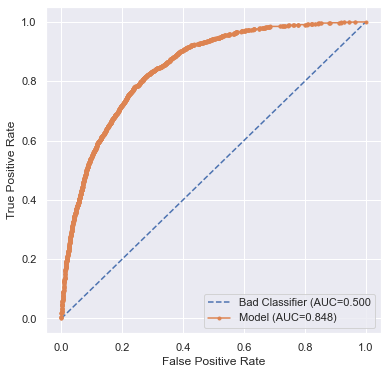

In [67]:
# Calculating ROC for model trained on all features (oversampled) 

from sklearn.metrics import classification_report, roc_curve, roc_auc_score

lr = LogisticRegression(solver = 'liblinear')
lr.fit(ori_x_oversampled, ori_y_oversampled)

# Probabilities for positive outcomes
lr_probs = lr.predict_proba(ori_x)[:, 1]

# 50-50 Chance (Bad Classifier)
bc_probs = [0 for _ in range(len(ori_y))]

# Calculate AUC Scores and ROC Curves
bc_auc = roc_auc_score(ori_y, bc_probs)
lr_auc = roc_auc_score(ori_y, lr_probs)

bc_fpr, bc_tpr, bc_thresh = roc_curve(ori_y, bc_probs)
lr_fpr, lr_tpr, lr_thresh = roc_curve(ori_y, lr_probs)

# Plot

sns.set(rc={'figure.figsize':(6,6)})

# plot the roc curve for the model
plt.plot(bc_fpr, bc_tpr, linestyle='--', label='Bad Classifier (AUC=%.3f' % (bc_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model (AUC=%.3f)' % (lr_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

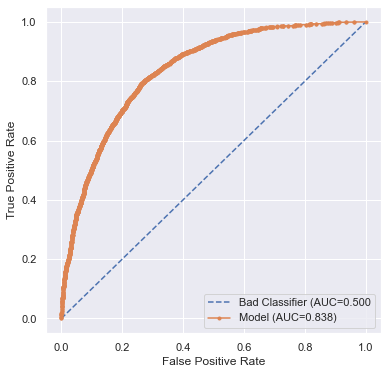

In [69]:
# Calculating ROC for model trained on selected features (oversampled)

lr = LogisticRegression(solver = 'liblinear')
lr.fit(sel_x_oversampled, sel_y_oversampled)

# Probabilities for positive outcomes
lr_probs = lr.predict_proba(sel_x)[:, 1]

# 50-50 Chance (Bad Classifier)
bc_probs = [0 for _ in range(len(sel_y))]

# Calculate AUC Scores and ROC Curves
bc_auc = roc_auc_score(ori_y, bc_probs)
lr_auc = roc_auc_score(ori_y, lr_probs)

bc_fpr, bc_tpr, bc_thresh = roc_curve(ori_y, bc_probs)
lr_fpr, lr_tpr, lr_thresh = roc_curve(ori_y, lr_probs)

# Plot

sns.set(rc={'figure.figsize':(6,6)})

# plot the roc curve for the model
plt.plot(bc_fpr, bc_tpr, linestyle='--', label='Bad Classifier (AUC=%.3f' % (bc_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model (AUC=%.3f)' % (lr_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()